In [2]:
import os
from radar_scenes.sequence import Sequence

# Load RadarScenes dataset.
PATH_TO_DATASET = "/home/robesafe/Datasets/RadarScenes"
if not os.path.exists(PATH_TO_DATASET):
    raise FileNotFoundError("Dataset not found at {}".format(PATH_TO_DATASET))

SEQUENCE_NUMBER = 1
filename = os.path.join(PATH_TO_DATASET, "data", f"sequence_{SEQUENCE_NUMBER}", "scenes.json")
sequence = Sequence.from_json(filename)
SCENES_NUMBER = sum(1 for x in sequence.scenes())  # a dirty way to compute the length of a generator.

In [3]:
import pandas as pd
from tqdm import tqdm
START_SEQ, END_SEQ = 1, 60

scenes_data = []
for seq_number in tqdm(range(START_SEQ, END_SEQ + 1)):
    seq_filename = os.path.join(PATH_TO_DATASET, "data", f"sequence_{seq_number}", "scenes.json")
    sequence = Sequence.from_json(seq_filename)
    timestamps = sequence.timestamps
    
    for timestamp in timestamps:
        scene = sequence.get_scene(timestamp)
        scene_radar_data = pd.DataFrame(scene.radar_data)
        scenes_data.append(scene_radar_data)    

res = pd.concat(scenes_data)
print(res)

100%|██████████| 60/60 [02:54<00:00,  2.90s/it]


          timestamp  sensor_id   range_sc  azimuth_sc        rcs        vr  \
0      156862647501          1   2.566963   -0.124031 -28.300673  0.009330   
1      156862647501          1   2.096815    0.849328 -26.863953 -8.023678   
2      156862647501          1   3.338323    1.106456 -26.564907 -9.334642   
0      156862659751          2   8.882484    1.156905   0.101503 -7.361293   
1      156862659751          2   9.479269    1.090472  -3.724234 -7.834501   
..              ...        ...        ...         ...        ...       ...   
217  18911385359951          2  37.169346    0.383739  18.789371 -2.708037   
218  18911385359951          2  41.992672    0.444825  -5.240848 -2.712838   
219  18911385359951          2  43.633587    0.431280  -7.286972 -2.711053   
220  18911385359951          2  44.703930    0.423473  -2.247520 -2.705440   
221  18911385359951          2  68.326965    0.377945  -8.397095 -1.959082   

     vr_compensated       x_cc      y_cc       x_seq       y_se

In [5]:
PATH_TO_CSV = os.path.join("/home/robesafe/Santi", "radarscenes_csv_p1.csv")
res.to_csv(PATH_TO_CSV)

(0.0, 500000.0)

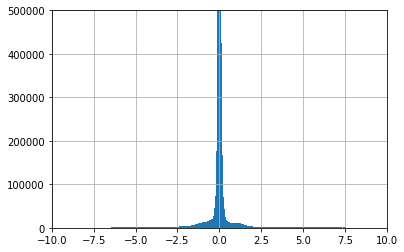

In [14]:
ax = res['vr_compensated'].hist(bins=10000)
ax.set_xlim(-10, 10)
ax.set_ylim(0, 5e5)

(0.0, 500000.0)

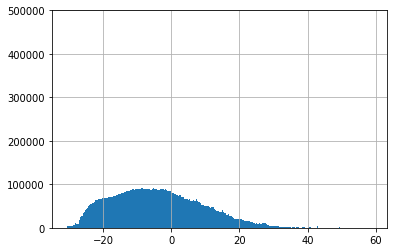

In [16]:
ax = res['rcs'].hist(bins=1000)
ax.set_ylim(0, 5e5)